In [75]:
%matplotlib inline


import numpy as np # the Python array package
import matplotlib.pyplot as plt  # the Python plotting package
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting 



In [76]:
onsets_1back = np.array([4, 72, 140, 208, 276, 344, 412, 480, 548, 616])
onsets_2back = np.array([38, 106, 174, 242, 310, 378, 446, 514, 582, 650])

onsets_nback = sorted(np.concatenate((onsets_1back, onsets_2back), axis = 0))
vol_num = 340

TR = 2
duration = 30

vectors_blocks = np.zeros((vol_num, len(onsets_nback)))



In [49]:
for i in range(len(onsets_nback)):
    vector = np.zeros(vol_num)
    start = int(onsets_nback[i]/TR)
    stop = start + int(duration/TR)
    vector[start:stop] = 1       
    vectors_blocks[:,i] = vector


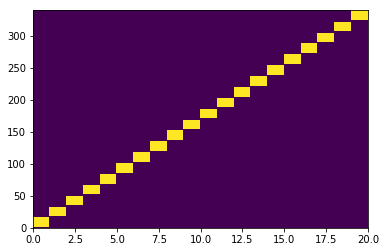

In [50]:
#plt.plot(vectors_blocks)

plt.pcolormesh(vectors_blocks)


plt.show()

In [63]:
vectors_blocks = vectors_blocks.astype('bool')

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True]], dtype=bool)

In [56]:
top_dir = '/home/finc/Downloads/results/'


In [55]:
vectors_blocks.shape

(340, 20)

In [59]:
timeseries = np.load(top_dir + 'LearningBrain_all_timeseries_aCompCor_power.npy')

timeseries.shape

(3, 4, 1, 340, 264)

In [69]:
correlarion_matrices_dFC = np.zeros((len(timeseries[:, 0, 0, 0, 0 ]), len(timeseries[0, :, 0, 0, 0 ]), len(vectors_blocks[0,:]), len(timeseries[0, 0, 0, 0, : ]), len(timeseries[0, 0, 0, 0, : ])))

for i in range(len(timeseries[:, 0, 0, 0, 0 ])):
    for j in range(len(timeseries[0, :, 0, 0, 0 ])):
        for k in range(len(vectors_blocks[0,:])):
            window_timeseries = timeseries[i, j, 0, vectors_blocks[:, k], :]
            correlation_measure = ConnectivityMeasure(kind = 'correlation')
            window_matrix = correlation_measure.fit_transform([window_timeseries])[0]
            np.fill_diagonal(window_matrix, 0)
            correlarion_matrices_dFC[i, j, k, :, :] = window_matrix 

               



In [70]:
correlarion_matrices_dFC.shape

(3, 4, 20, 264, 264)

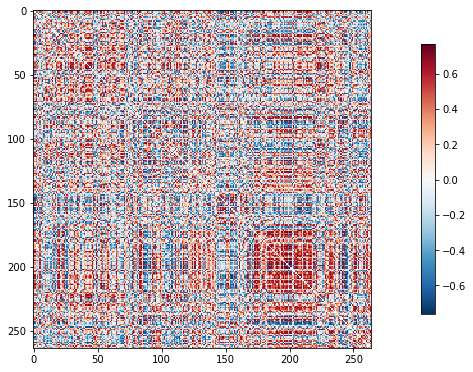

In [77]:
plotting.plot_matrix(correlarion_matrices_dFC[0, 0, 1, :, :])

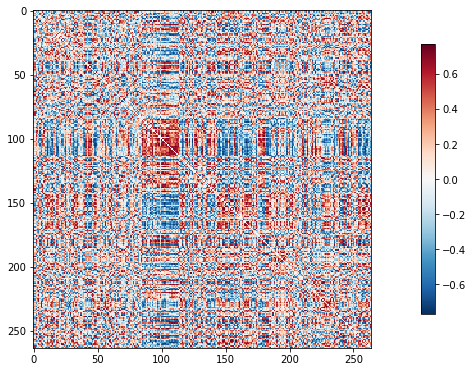

In [81]:
plotting.plot_matrix(correlarion_matrices_dFC[1, 0, 14, :, :])

In [83]:
np.save(top_dir + 'LearningBrain_dFC_matrices.npy', correlarion_matrices_dFC)      

In [ ]:
correlarion_matrices_dual = np.zeros((len(subs), len(sess), 2, len(timeseries_all[0, 0, 0, 0, : ]), len(timeseries_all[0, 0, 0, 0, : ])))


for sub in range(len(timeseries_all[:, 0, 0, 0, 0])):
    for ses in range(len(timeseries_all[0,:,0,0,0])):                 
        timeseries_dual1back = timeseries_all[sub, ses, 0, dual1back, :]
        timeseries_dual2back = timeseries_all[sub, ses, 0, dual2back, :]
        
        correlation_measure = ConnectivityMeasure(kind = 'correlation')
        fc1 = correlation_measure.fit_transform([timeseries_dual1back])[0]
        np.fill_diagonal(fc1, 0)
        
        fc2 = correlation_measure.fit_transform([timeseries_dual2back])[0]
        np.fill_diagonal(fc2, 0)
                     
        correlarion_matrices_dual[sub, ses, 0, :, :] = fc1
        correlarion_matrices_dual[sub, ses, 1, :, :] = fc2


In [61]:
correlarion_matrices_dFC.shape

(3, 4, 20, 264, 264)